<center><h2>DATA UNDERSTANDING</h2></center>

- Store ID: (Index) ID of the particular store.
- Store_Area: Physical Area of the store in yard square.
- Items_Available: Number of different items available in the corresponding store.
- DailyCustomerCount: Number of customers who visited to stores on an average over month.
- Store_Sales: Sales in (US $) that stores made.

## Import Library/dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/Stores.csv")
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
Store ID                896 non-null int64
Store_Area              896 non-null int64
Items_Available         896 non-null int64
Daily_Customer_Count    896 non-null int64
Store_Sales             896 non-null int64
dtypes: int64(5)
memory usage: 35.1 KB


In [4]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [5]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(896, 5)

In [8]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

### Visualizing the correlation matrix

In [9]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)

<AxesSubplot:>

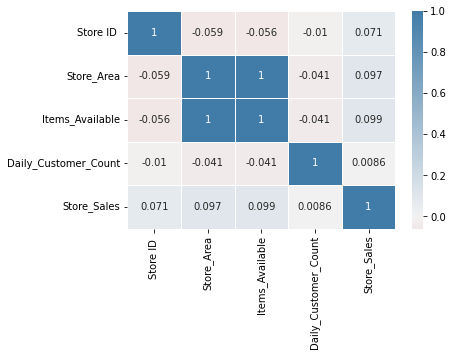

In [10]:
sns.heatmap(
df.corr(), center=0,
cmap=cmap, linewidths=1,
annot=True)

In [11]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

<AxesSubplot:>

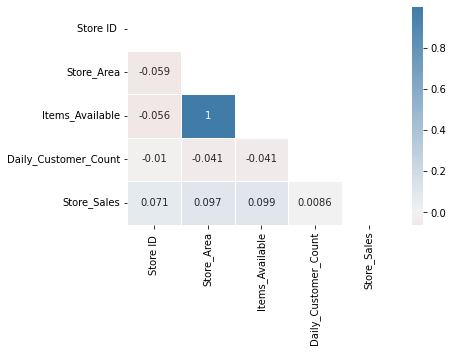

In [12]:
sns.heatmap(
df.corr(), mask=mask,
center=0, cmap=cmap, linewidths=1,
annot=True)

In [13]:
corr = df.corr()
print(corr['Store_Sales'])

Store ID                0.071486
Store_Area              0.097474
Items_Available         0.098849
Daily_Customer_Count    0.008629
Store_Sales             1.000000
Name: Store_Sales, dtype: float64


### Summarize each columns

In [14]:
MinSales = df['Store_Sales'].min()
MaxSales = df['Store_Sales'].max()
MeanSales = df['Store_Sales'].mean()
print("Minimum sales(USD) = ",MinSales)
print("Maximum sales(USD) =",MaxSales)
print("Mean sales(USD) =",round(MeanSales, 6))

Minimum sales(USD) =  14920
Maximum sales(USD) = 116320
Mean sales(USD) = 59351.305804


In [15]:
MinArea = df['Store_Area'].min()
MaxArea = df['Store_Area'].max()
MeanArea = df['Store_Area'].mean()
print("Minimum Area(yard square) =",MinArea)
print("Maximum Area(yard square) =",MaxArea)
print("Mean Area(yard square) =",round(MeanArea, 6))

Minimum Area(yard square) = 775
Maximum Area(yard square) = 2229
Mean Area(yard square) = 1485.409598


In [16]:
MinCustomers = df['Daily_Customer_Count'].min()
MaxCustomers = df['Daily_Customer_Count'].max()
MeanCustomers = df['Daily_Customer_Count'].mean()
print("Minimum Customers(avg month) =",MinCustomers)
print("Maximum Customers(avg month) =",MaxCustomers)
print("Mean Customers(avg month) =",round(MeanCustomers, 6))

Minimum Customers(avg month) = 10
Maximum Customers(avg month) = 1560
Mean Customers(avg month) = 786.350446


In [17]:
MinItems = df['Items_Available'].min()
MaxItems = df['Items_Available'].max()
MeanItems = df['Items_Available'].mean()
print("Minimum Items(in store) =",MinItems)
print("Maximum Items(in store) =",MaxItems)
print("Mean Items(in store) =",round(MeanItems, 0))

Minimum Items(in store) = 932
Maximum Items(in store) = 2667
Mean Items(in store) = 1782.0


### see most and fewest sales along with other columns

In [18]:
MostSales = pd.DataFrame(df.nlargest(10, ['Store_Sales']))
MostSales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


In [19]:
FewerSales = pd.DataFrame(df.nsmallest(10, ['Store_Sales']))
FewerSales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1250,1508,990,14920
852,853,1477,1790,880,16370
775,776,1537,1877,660,17670
593,594,1624,1946,870,20270
352,353,1397,1686,850,21300
725,726,1445,1734,900,21470
372,373,1876,2254,1340,21650
277,278,1572,1869,1030,21750
252,253,1583,1907,680,21830
670,671,1461,1739,1250,22310


### Visualizing sales with high correlation in other column

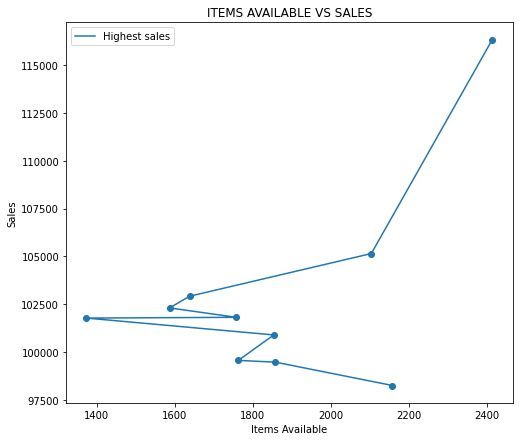

In [20]:
plt.figure(figsize=(8,7))

x = MostSales['Items_Available']
y = MostSales['Store_Sales']

plt.plot(x, y, label = "Highest sales")
plt.xlabel('Items Available')
plt.ylabel('Sales')
plt.title('ITEMS AVAILABLE VS SALES')

plt.legend()
plt.scatter(x, y)
plt.show()

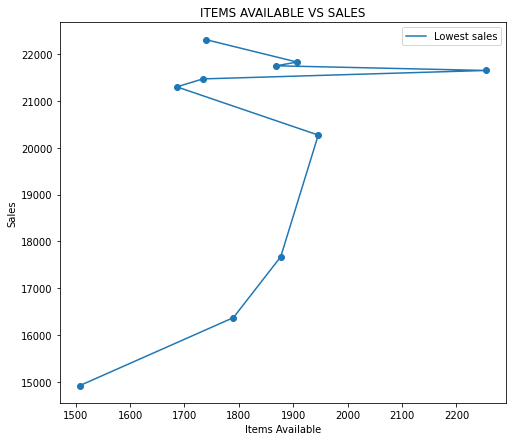

In [21]:
plt.figure(figsize=(8,7))

x = FewerSales['Items_Available']
y = FewerSales['Store_Sales']

plt.plot(x, y, label = "Lowest sales")
plt.xlabel('Items Available')
plt.ylabel('Sales')
plt.title('ITEMS AVAILABLE VS SALES')

plt.legend()
plt.scatter(x, y)
plt.show()

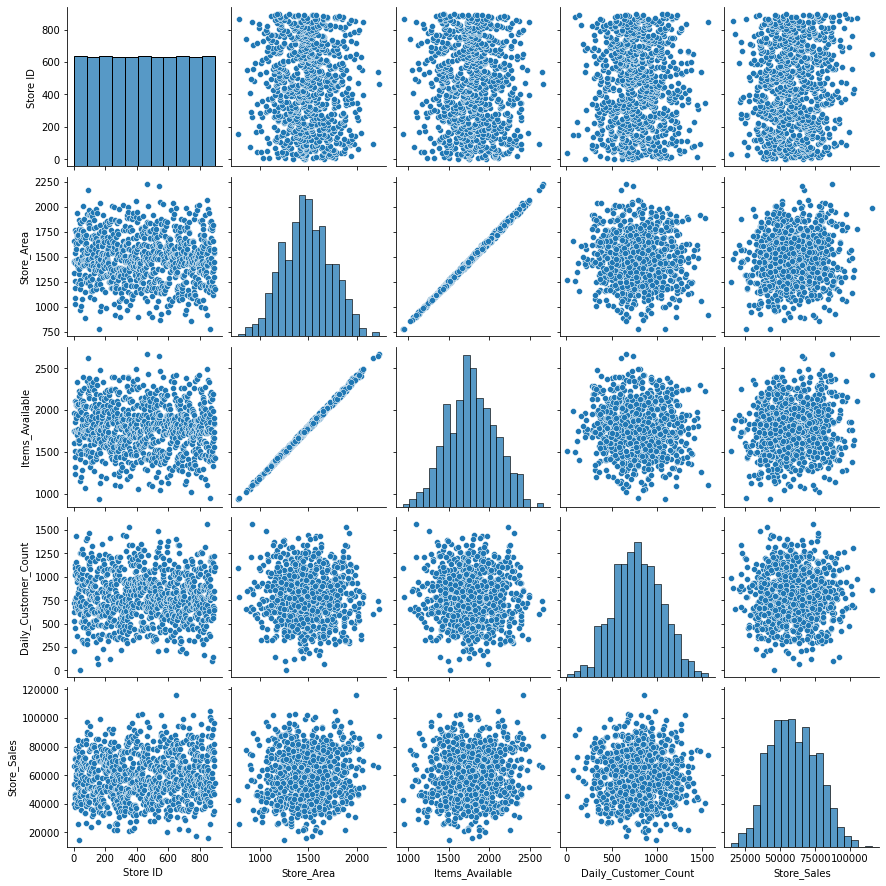

In [22]:
sns.pairplot(df)
plt.show()

<b>Interpretation : <b><br>
1. As Store Area increases, Items available in store also increases (Positive Correlation)
2. As store area increases, there is (little) decrease in the daily_customer count (Negative correlation)
3. As store area increases, store sales also increases
4. As items available increases, it is independent of daily customer count
5. As items_available increases, store sales increases (not much, but a little positive correlation)

### Analysis using contour plots to tell the density of distribution

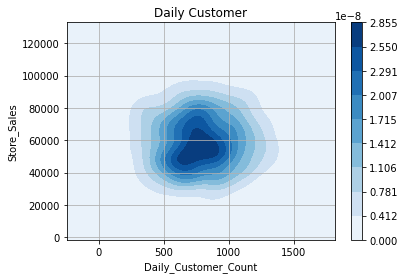

In [23]:
sns.kdeplot(x=df.Daily_Customer_Count, y=df.Store_Sales, cmap="Blues", shade=True, thresh=0,cbar=True)
plt.title('Daily Customer')
plt.grid()

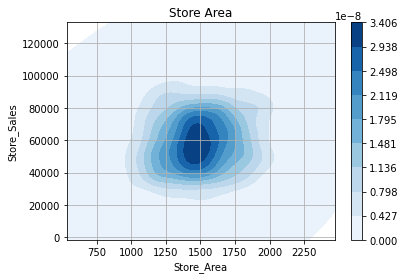

In [24]:
sns.kdeplot(x=df.Store_Area, y=df.Store_Sales, cmap="Blues", shade=True, thresh=0,cbar=True)
plt.title('Store Area')
plt.grid()

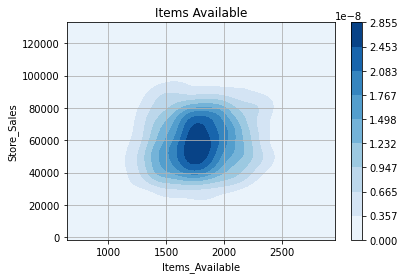

In [25]:
sns.kdeplot(x=df.Items_Available, y=df.Store_Sales, cmap="Blues", shade=True, thresh=0,cbar=True)
plt.title('Items Available')
plt.grid()

<b>Interpretation : <b><br>
    
For Store Sales from 40.000 - 80.000 : 
- Daily Customer ranges from 500 - 1000
- Store_Area ranges from 1250 - 1750
- Items Available ranges from 1500 - 2000

### Analysis store area using technique range

In [26]:
df['Store_Area_Range'] = pd.qcut(df['Store_Area'], 10)

In [27]:
df.groupby('Store_Area_Range').agg(['std', 'mean'])

Store ID              Store_Area               \
                          std        mean        std         mean   
Store_Area_Range                                                    
(774.999, 1165.0]  248.474281  480.769231  93.280181  1058.373626   
(1165.0, 1252.0]   254.503724  483.303371  25.914544  1212.932584   
(1252.0, 1359.0]   261.212161  437.842697  27.923112  1312.584270   
(1359.0, 1429.0]   254.473970  436.855556  20.819122  1394.588889   
(1429.0, 1477.0]   289.779189  432.766667  14.452747  1452.511111   
(1477.0, 1539.0]   236.032311  476.528090  18.137280  1509.247191   
(1539.0, 1614.5]   250.501046  471.539326  23.254740  1576.966292   
(1614.5, 1703.0]   261.755263  433.411111  26.558667  1655.311111   
(1703.0, 1828.0]   271.436856  414.146067  33.269437  1760.910112   
(1828.0, 2229.0]   256.720624  417.933333  82.925565  1924.811111   

                  Items_Available              Daily_Customer_Count  \
                              std         mean                  std   
Store_Area_Range                                                      
(774.999, 1165.0]      111.893637  1270.648352           277.587109   
(1165.0, 1252.0]        32.536073  1458.078652           248.534109   
(1252.0, 1359.0]        37.490418  1572.370787           277.437659   
(1359.0, 1429.0]        29.432470  1674.277778           252.377459   
(1429.0, 1477.0]        20.730613  1743.488889           274.301200   
(1477.0, 1539.0]        25.741035  1810.112360           252.672286   
(1539.0, 1614.5]        32.409353  1890.483146           270.222972   
(1614.5, 1703.0]        37.671290  1986.555556           273.385945   
(1703.0, 1828.0]        41.603349  2110.157303           233.474938   
(1828.0, 2229.0]       100.455261  2309.100000           295.483036   

                                Store_Sales                
                         mean           std          mean  
Store_Area_Range                                           
(774.999, 1165.0]  808.571429  17823.066582  57617.692308  
(1165.0, 1252.0]   819.662921  17721.469226  56217.865169  
(1252.0, 1359.0]   782.584270  18859.815118  59658.202247  
(1359.0, 1429.0]   776.666667  16395.303483  59323.666667  
(1429.0, 1477.0]   786.444444  16318.415964  57997.555556  
(1477.0, 1539.0]   778.988764  15650.397119  58571.348315  
(1539.0, 1614.5]   790.000000  17399.645450  59462.022472  
(1614.5, 1703.0]   765.111111  16133.995322  60812.888889  
(1703.0, 1828.0]   760.898876  17211.020025  59562.584270  
(1828.0, 2229.0]   794.333333  17787.551713  64272.000000

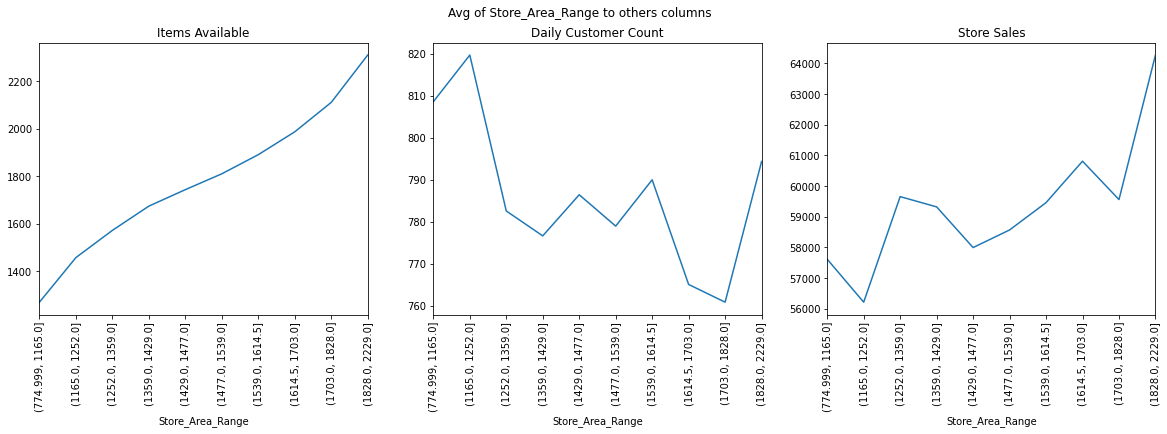

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.suptitle('Avg of Store_Area_Range to others columns')
df.groupby('Store_Area_Range')['Items_Available'].mean().plot(rot=90, ax=ax[0], title='Items Available')
df.groupby('Store_Area_Range')['Daily_Customer_Count'].mean().plot(rot=90, ax = ax[1], title='Daily Customer Count')
df.groupby('Store_Area_Range')['Store_Sales'].mean().plot(rot=90, ax=ax[2], title='Store Sales')
plt.show()

<b>Interpretation : <b><br>
- Chart 1 Represents Store Area Affect on Items Available. The larger store area, Then more items available
- Chart 2 Not Represents whatever. i mean is Store area not affect to Daily Customer Come
- Chart 3 Represents that Store Area affect to Sales. Why? Maybe because logically the larger Store Area then more costs are needed, so that the price in the store becomes expensive and with the size of Store Area it can be assumed that the store can sell many products.

<b>Why store area range (1165 - 1252) has decreased income even though Daily Customer come in this range is the highest compared to others. let's dive deeper to answer this question.. Let'sssss gooooo<b>

In [29]:
df1 = df.copy()
df1['Store_Area_Range'] = df1['Store_Area_Range'].astype('str')
df2 = df1[df1['Store_Area_Range'] == '(1165.0, 1252.0]']

Why we convert column Store_Area_Range to String? its because column this not compatible to use int or float

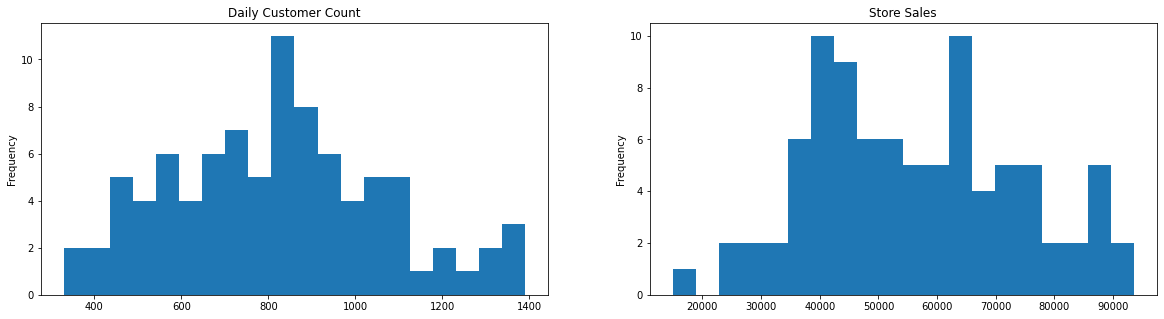

In [30]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
df2['Daily_Customer_Count'].plot.hist(bins=20, ax=axs[0], title='Daily Customer Count')
df2['Store_Sales'].plot.hist(bins=20, ax=axs[1], title='Store Sales')
plt.show()


In [31]:
df2[(df2['Store_Sales'] < 20000) | (df2['Store_Sales'] > 90000)]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range
31,32,1250,1508,990,14920,"(1165.0, 1252.0]"
421,422,1175,1405,810,91200,"(1165.0, 1252.0]"
477,478,1244,1480,860,93530,"(1165.0, 1252.0]"


In [32]:
df2[(df2['Daily_Customer_Count'] == df2['Daily_Customer_Count'].min()) | (df2['Daily_Customer_Count'] == df2['Daily_Customer_Count'].max())]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range
77,78,1250,1475,1390,65560,"(1165.0, 1252.0]"
511,512,1247,1490,330,65750,"(1165.0, 1252.0]"


In [33]:
df['avg_puchase'] = df['Store_Sales'] / df['Daily_Customer_Count']
df.groupby('Store_Area_Range').agg({'Daily_Customer_Count':np.sum, 'avg_puchase':np.mean})

,Daily_Customer_Count,avg_puchase
Store_Area_Range,,
"(774.999, 1165.0]",73580,85.039409
"(1165.0, 1252.0]",72950,75.709326
"(1252.0, 1359.0]",69650,146.929870
"(1359.0, 1429.0]",69900,86.293359
"(1429.0, 1477.0]",70780,90.230194
"(1477.0, 1539.0]",69330,84.940541
"(1539.0, 1614.5]",70310,86.562314
"(1614.5, 1703.0]",68860,101.072862
"(1703.0, 1828.0]",67720,87.667138


<b>Interpretation : <b><br>
1. I think the store area coverage only affects the available items.. Why?? Because the store area range (1252, 1359) has the lowest Daily Customer #4 but has the highest purchase_average
2. my opinion whats happen in store area range (1165, 1252), Why this store has highest daily customer but lowest in store sales : 
    - they only sell cheap items, that's why many customer come but the income low or 
    - customer come to store but not find what they want to buy
    
    

## Predictive using ML algorithms

In [34]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range,avg_puchase
0,1,1659,1961,530,66490,"(1614.5, 1703.0]",125.452830
1,2,1461,1752,210,39820,"(1429.0, 1477.0]",189.619048
2,3,1340,1609,720,54010,"(1252.0, 1359.0]",75.013889
3,4,1451,1748,620,53730,"(1429.0, 1477.0]",86.661290
4,5,1770,2111,450,46620,"(1703.0, 1828.0]",103.600000


In [35]:
df.drop(columns=['Store_Area_Range', 'avg_puchase'], inplace=True)

In [36]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [42]:
X = df.drop(columns='Store_Sales')
y = df['Store_Sales']

In [43]:
print("X :", X.shape, "Y :", y.shape)

X : (896, 4) Y : (896,)


In [44]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
lg_reg = LinearRegression()
rf_reg = RandomForestRegressor()
svm_reg = SVR()
gb_reg = GradientBoostingRegressor()

reg_list = [lg_reg,rf_reg,svm_reg,gb_reg]

for reg in reg_list:
        
    reg.fit(x,y)
        
    y_pred = reg.predict(x)
    
    mse = mean_squared_error(y_pred,y)
    rmse = np.sqrt(mean_squared_error(y_pred,y))
    mae = mean_absolute_error(y_pred,y)
    score = reg.score(x,y)
    
    print('Regressor:{}\nMSE:{:.2f}\nRMSE:{:.2f}\nMAE:{:.2f}\nScore:{:.4f}\n\n'.format(str(reg),mse,rmse,mae,score))

Regressor:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MSE:290357339.73
RMSE:17039.87
MAE:14070.50
Score:0.0164


Regressor:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MSE:44144075.61
RMSE:6644.10
MAE:5388.05
Score:0.8505


Regressor:SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE:295717303.13
RMSE:17196.43
MAE:14167.74
Score:-0.0018


Regressor:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criteri

<b>The best model is Random Forest model with : 
- MSE:43571270.63
- RMSE:6600.85
- MAE:5373.85
- Score:0.8524